<a href="https://colab.research.google.com/github/nadunchanna98/machine-learning/blob/main/Nonlinear_Models_Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2019E094 LAB_03

In this LAB

*   Introducing Keras datasets.
*   ANN for classification and regression.
*   Evaluating the model.
*   Introducing the validation dataset.

###### Keras is a deep learning library in Python which provides an interface for creating an artificial neural network. It is an open-sourced program. It is built on top of Tensorflow.

### 1. Study the dataset ’Fashion-MNIST’ in Keras. Answer the following questions in relation to the above dataset.

### **(a) Find out whether it can be used for regression or classification.**

  The 'Fashion-MNIST' dataset can be used for classification tasks.

### **(b) What is the size of the images?**

  The size of the images in the dataset is 28x28 pixels.


### **(c) How many images are there in the train data?**

  The number of images in the training data is 60,000.


### **(d) State the number of images in test data.**

  The number of images in the test data is 10,000.


### **(e) How many classes are there in the data? Write down those classes.**

  There are 10 classes in the data, represented by the following labels:


*   T-shirt/top
*   Trouser
*   Pullover
*   Dress
*   Coat
*   Sandal
*   Shirt
*   Sneaker
*   Bag
*   Ankle boot

### 2. Load that dataset directly from Keras using Python.


In [44]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## First step again do using python 

In [45]:
#(b) What is the size of the images?
image_size = train_images[0].shape
print("Image size:", image_size)

Image size: (28, 28)


In [46]:
#(c) How many images are there in the train data?
train_images_count = len(train_images)
print("Number of images in train data:", train_images_count)

Number of images in train data: 60000


In [47]:
#(d) State the number of images in test data.
test_images_count = len(test_images)
print("Number of images in test data:", test_images_count)

Number of images in test data: 10000


In [48]:
#(e) How many classes are there in the data? Write down those classes.
num_classes = len(set(train_labels))
class_labels = set(train_labels)
print("Number of classes:", num_classes)
print("Class labels:", class_labels)

Number of classes: 10
Class labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


### 3. View some images in training data, for example draw the 11th image in your training data.


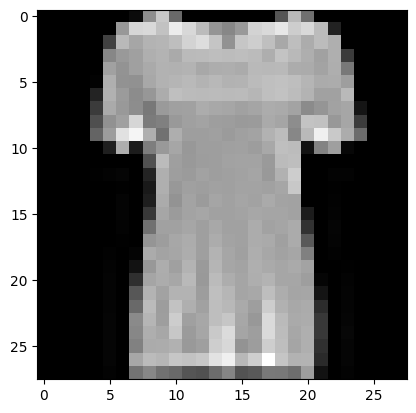

In [49]:
import matplotlib.pyplot as plt

# Display the 11th image in the training data
plt.imshow(train_images[10], cmap='gray')
plt.show()

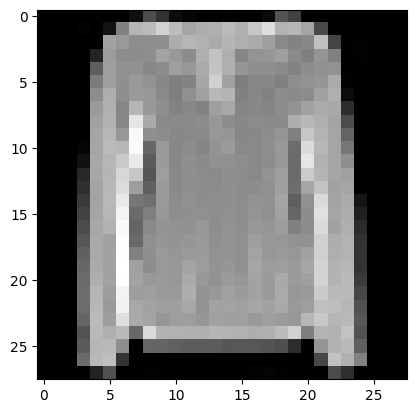

In [50]:
plt.imshow(train_images[9999], cmap='gray')
plt.show()

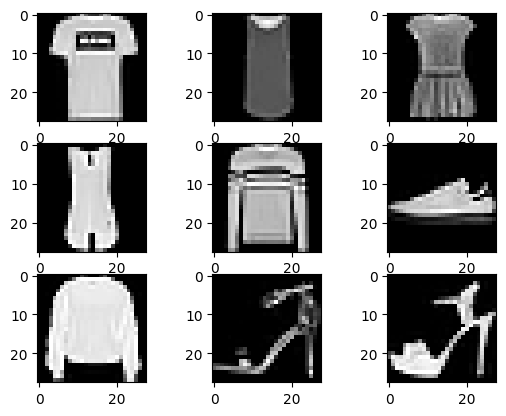

In [51]:
for i in range(1, 10):

    # Create a 3x3 grid and place the
    # image in ith position of grid

    plt.subplot(3, 3, i)
    # Insert ith image with the color map 'grap'
    plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))

plt.show()

### 4. Normalize your data (train and test) between 0 and 1.
#### Hint: This is a grayscale image has pixel values between 0 and 255.


 we are normalizing the data by scaling the pixel values of the images between 0 and 1. 

In the case of the 'Fashion-MNIST' dataset, the pixel values of the grayscale images range from 0 to 255, where 0 represents black and 255 represents white. By dividing all the pixel values by 255, we effectively scale the values between 0 and 1.

benefits:

*   It makes the model less sensitive to the scale of the input features, ensuring that the learning process is not biased towards variables with larger values.

*   It can speed up the training process, as smaller input values generally result in faster convergence.

*   It can prevent numerical instability, particularly in neural networks where large input values can cause the activation functions to saturate.

In [52]:
# Normalize the training and test data
train_images = train_images / 255.0
test_images = test_images / 255.0

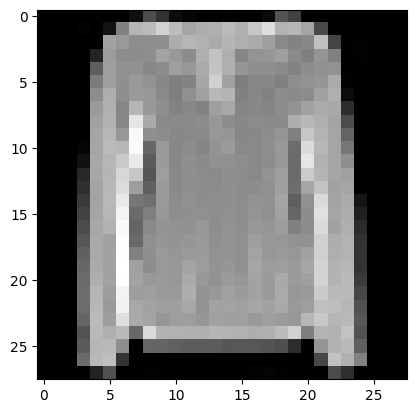

In [53]:
plt.imshow(train_images[9999], cmap='gray')
plt.show()

In [54]:
test_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

###5) Now divide the training data into two: Validation images (first 5000 images from the initial training data) and Training images (rest of the images in your initial training data).


In [55]:
validation_images = train_images[:5000]
validation_labels = train_labels[:5000]
train_images = train_images[5000:]
train_labels = train_labels[5000:]

###6) Initialize the weight and bias parameters of your model.

In [58]:
# we are building the neural network model with the specified characteristics using the Keras library.
# The neural network model will consist of input, hidden, and output layers.
# Each defined with specific configurations.

### 7) Now build the neural network model with the following characteristics:

### (a) One Flatten layer as the input layer.
### (b) Two dense relu layers as hidden layers.
### (c) A dense softmax layer as the output layer.


In [61]:
# Input Layer: The input layer is a Flatten layer. 
# It serves as the entry point of the neural network and is responsible for flattening the input data.
# In the case of the 'Fashion-MNIST' dataset, the input data consists of 28x28 pixel images. 
# The Flatten layer transforms the 2D input data into a 1D array.

# The Input Layer is the entry point of the neural network model and takes the input data. 
# It provides a way to feed the data into the neural network and has a specific shape or dimensions to match the input data.


In [62]:
# Hidden Layers: Hidden Layers are the layers between the Input Layer and the Output Layer. 
# They perform transformations on the input data through a series of weighted computations and activation functions, extracting relevant features and patterns from the data.


In [63]:
# Output Layer: The Output Layer is the final layer of the neural network model that produces the predicted output or result. 
# Its configuration depends on the specific task, such as classification or regression, and often includes an activation function tailored to the task requirements.

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Build the neural network model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))    # Input layer
model.add(Dense(128, activation='relu'))    # First hidden layer
model.add(Dense(64, activation='relu'))      # Second hidden layer
model.add(Dense(10, activation='softmax'))    # Output layer